In [1]:
from apportionment import *

In [2]:
# db_file = 'lowest_samples_complete.db'

# years = ["1994", "1998", "2002", "2006", "2010", "2012", "2016", "2020", "2023"]

# conn = sqlite3.connect(db_file)
# cur = conn.cursor()
        
# for year in years:
#     cur.execute(f'''CREATE TABLE IF NOT EXISTS tab{year} (
#                 iteration_number INTEGER,
#                 party_number INTEGER,
#                 samples INTEGER,
#                 diff INTEGER
#                 );''')

#     # Read and insert data from CSV
#     with open(f'./raw_data/1m-{year}.csv', 'r') as file:
#         reader = csv.reader(file)
#         next(reader)  # Skip header if exists
#         for i, row in enumerate(reader):
#             cur.execute(f'''INSERT INTO tab{year} (iteration_number, party_number, samples, diff)
#                             VALUES (?, ?, ?, ?);''', row)
        
# # Commit changes and close connection
# conn.commit()
# conn.close()


In [3]:
# years = ["2023", "2020", "2016", "2012", "2010", "2006", "2002", "1998", "1994"]

# for year in year:
#     with sqlite3.connect('lowest_samples_complete.db') as conn:
#         cur = conn.cursor()

#         cur.execute(f'''
#             SELECT iteration_number, party_number, MIN(samples) 
#             FROM tab{year} 
#             WHERE diff > 0 
#             GROUP BY iteration_number, party_number;
#         ''')

#         results = cur.fetchall()

#         with open(f'lowest_samples{year}all.csv', 'w', newline='') as csvfile:
#             csvwriter = csv.writer(csvfile)
#             csvwriter.writerow(['iteration_number', 'party_number', 'lowest_samples'])
#             csvwriter.writerows(results)



c:\Users\janko\anaconda3x\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\janko\anaconda3x\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


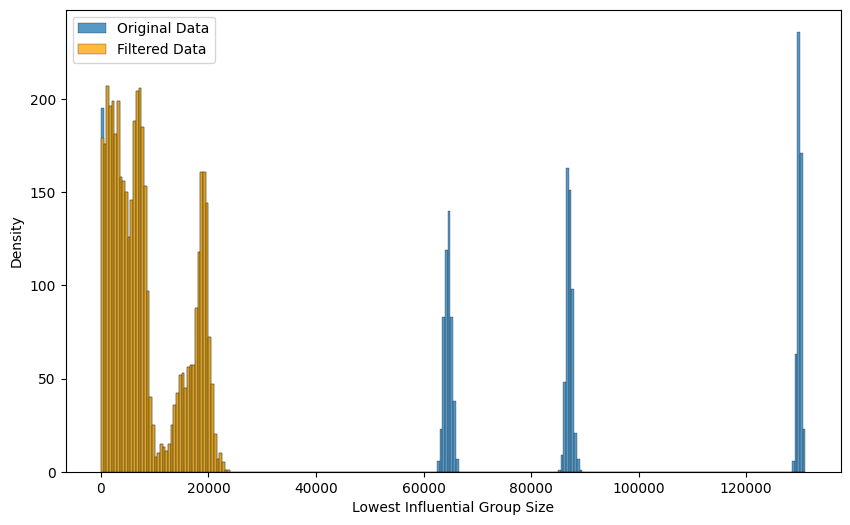

Mean: 29602.93, Std Dev: 39794.44
Mean: 8337.33, Std Dev: 6569.98


In [4]:
df = pd.read_csv(f'./db_exports/lowest_samples2023all.csv', header=0)
df["lowest_samples"] = df["lowest_samples"] * (4388872 / 1000000)
exclude_set = {1, 2, 4, 6, 7, 8, 9, 10, 11, 13, 14, 19, 20, 21, 22, 24}

# Filtering rows where 'party_number' is NOT in 'exclude_set'
xx = df[~df['party_number'].isin(exclude_set)]
 
# Determine the min and max range for the bin edges
data_min = min(df["lowest_samples"].min(), xx["lowest_samples"].min())
data_max = max(df["lowest_samples"].max(), xx["lowest_samples"].max())

# Define bin edges with a consistent size
bin_width = 500  # or any other desired width
bin_edges = np.arange(data_min, data_max + bin_width, bin_width)

# Create a new figure
plt.figure(figsize=(10, 6))

# Plot the histogram with consistent bins for 'df' (original data)
sns.histplot(df["lowest_samples"], bins=bin_edges, label='Original Data')

# Plot the histogram with consistent bins for 'xx' (filtered data)
sns.histplot(xx["lowest_samples"], bins=bin_edges, color='orange', label='Filtered Data')

plt.xlabel('Lowest Influential Group Size')
plt.ylabel('Density')
plt.legend()
plt.show()

mean_value = np.mean(df.iloc[:, 2])
std_dev = np.std(df.iloc[:, 2])

print(f"Mean: {mean_value:.2f}, Std Dev: {std_dev:.2f}")

mean_value = np.mean(xx.iloc[:, 2])
std_dev = np.std(xx.iloc[:, 2])

print(f"Mean: {mean_value:.2f}, Std Dev: {std_dev:.2f}")


In [5]:
years = ["2023", "2020", "2016", "2012", "2010", "2006", "2002", "1998", "1994"]

cumulative_data_all = np.array([])
cumulative_data = np.array([])

for i, year in enumerate(years):
    df = pd.read_csv(f'./db_exports/lowest_samples{year}all.csv', header=0)
    df["lowest_samples"] = df["lowest_samples"] * (constants.all_voters[int(year)] / 1000000)
    
    cumulative_data_all = np.append(cumulative_data_all, df["lowest_samples"].values)

    df = pd.read_csv(f'./db_exports/lowest_samples{year}.csv', header=0)
    df["lowest_samples"] = df["lowest_samples"] * (constants.all_voters[int(year)] / 1000000)
    
    cumulative_data = np.append(cumulative_data, df["lowest_samples"].values)


c:\Users\janko\anaconda3x\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\janko\anaconda3x\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


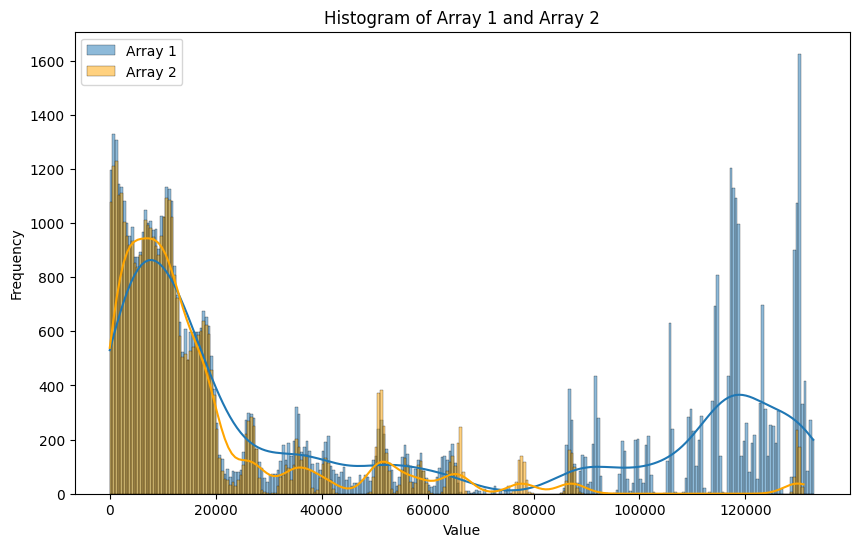

 Likely electable. Mean: 17780, Std Dev: 21993
 All. Mean: 48620, Std Dev: 48761


In [6]:
data_min = min(cumulative_data_all.min(), cumulative_data.min())
data_max = max(cumulative_data_all.max(), cumulative_data.max())

# Define consistent bin edges
bin_width = 500  # Adjust bin width as needed
bin_edges = np.arange(data_min, data_max + bin_width, bin_width)

# Create a new figure
plt.figure(figsize=(10, 6))

# Plot histogram for array1
sns.histplot(cumulative_data_all, bins=bin_edges, label='Likely eectable subjects')

# Plot histogram for array2 with a different color
sns.histplot(cumulative_data, bins=bin_edges, color='orange', label='All subjects')

plt.xlabel('Lowest influential size of the coordinated group')
plt.ylabel('Frequency')
plt.legend()
plt.show()

cumulative_mean = np.mean(cumulative_data)
cumulative_std_dev = np.std(cumulative_data)

print(f" Likely electable. Mean: {cumulative_mean:.0f}, Std Dev: {cumulative_std_dev:.0f}")

cumulative_mean = np.mean(cumulative_data_all)
cumulative_std_dev = np.std(cumulative_data_all)

print(f" All. Mean: {cumulative_mean:.0f}, Std Dev: {cumulative_std_dev:.0f}")



Year 2023 - Mean: 29603, Std Dev: 39794
Year 2020 - Mean: 22106, Std Dev: 25975
Year 2016 - Mean: 56380, Std Dev: 55672
Year 2012 - Mean: 83913, Std Dev: 50834
Year 2010 - Mean: 26231, Std Dev: 19204
Year 2006 - Mean: 75641, Std Dev: 48059
Year 2002 - Mean: 47173, Std Dev: 44848
Year 1998 - Mean: 11050, Std Dev: 8453
Year 1994 - Mean: 9639, Std Dev: 10909


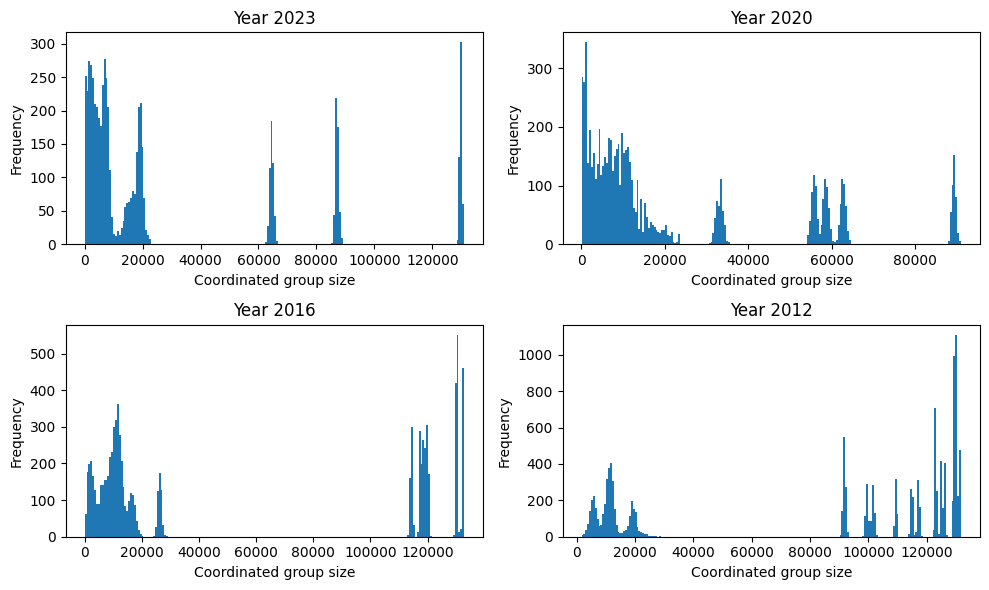

 Mean: 48620, Std Dev: 48761


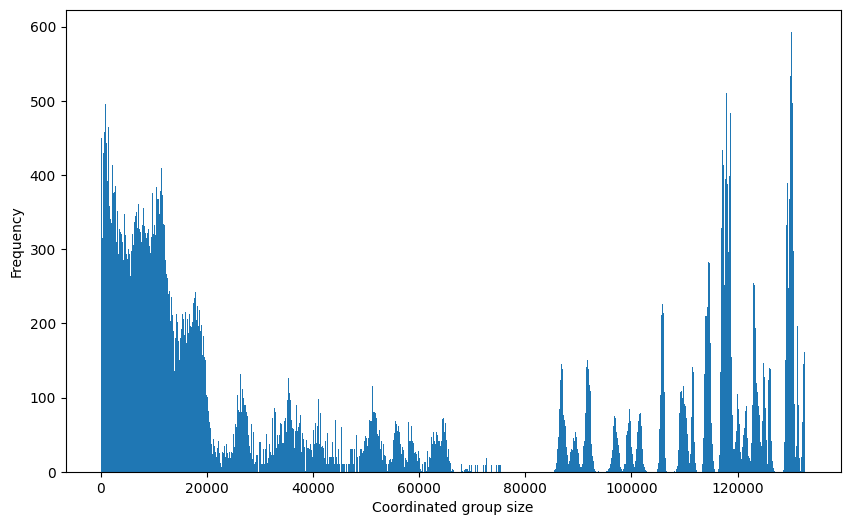

In [8]:
years = ["2023", "2020", "2016", "2012", "2010", "2006", "2002", "1998", "1994"]

cumulative_data = []

fig, axs = plt.subplots(2, 2, figsize=(10, 6))

axs = axs.ravel()

for i, year in enumerate(years):
    df = pd.read_csv(f'./db_exports/lowest_samples{year}all.csv', header=0)
    df["lowest_samples"] = df["lowest_samples"] * (constants.all_voters[int(year)]/ 1000000)
    
    cumulative_data.extend(df.iloc[:, 2])

    mean_value = np.mean(df.iloc[:, 2])
    std_dev = np.std(df.iloc[:, 2])

    try:
        axs[i].hist(df.iloc[:, 2], bins=200)
        
        axs[i].set_xlabel('Coordinated group size')
        axs[i].set_ylabel('Frequency')
        axs[i].set_title(f'Year {year}')

    except IndexError:
        pass

    print(f"Year {year} - Mean: {mean_value:.0f}, Std Dev: {std_dev:.0f}")


plt.tight_layout()  # Adjust subplot spacing for better visibility
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(cumulative_data, bins=800)
plt.xlabel('Coordinated group size')
plt.ylabel('Frequency')

cumulative_mean = np.mean(cumulative_data)
cumulative_std_dev = np.std(cumulative_data)

print(f" Mean: {cumulative_mean:.0f}, Std Dev: {cumulative_std_dev:.0f}")

plt.show()


In [9]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# import numpy as np
# from scipy import stats

# years = ["2023", "2020", "2016", "2012", "2010", "2006", "2002", "1998", "1994"]

# # Define a function to calculate confidence interval
# def confidence_interval(data, confidence=0.95):
#     n = len(data)
#     mean, std_err = np.mean(data), stats.sem(data)
#     margin_err = std_err * stats.t.ppf((1 + confidence) / 2, n - 1)
#     return mean, margin_err

# for year in years:
#     df = pd.read_csv(f'lowest_samples{year}.csv', header=0)

#     # Boxplot
#     plt.figure(figsize=(8, 6))
#     sns.boxplot(data=df.iloc[:, 2])
#     plt.xlabel('Third Column')
#     plt.title(f'Boxplot of the {year}')
#     plt.show()

#     # Calculate average, confidence interval, and dispersion
#     avg = np.mean(df.iloc[:, 2])
#     conf_interval = confidence_interval(df.iloc[:, 2])
#     dispersion = np.var(df.iloc[:, 2])

#     print(f'Year: {year}')
#     print(f'Average: {avg}')
#     print(f'Confidence Interval (95%): {conf_interval[0]} ± {conf_interval[1]}')
#     print(f'Dispersion (Variance): {dispersion}')
#     print('---------------------------------------')


In [10]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(f'lowest_samples2020-p12.csv', header=0)

plt.hist(df.iloc[:, 2], bins=200)
plt.xlabel('Third Column')
plt.ylabel('Frequency')
plt.title(f'Histogram of the 2020 subject 12')
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'lowest_samples2020-p12.csv'

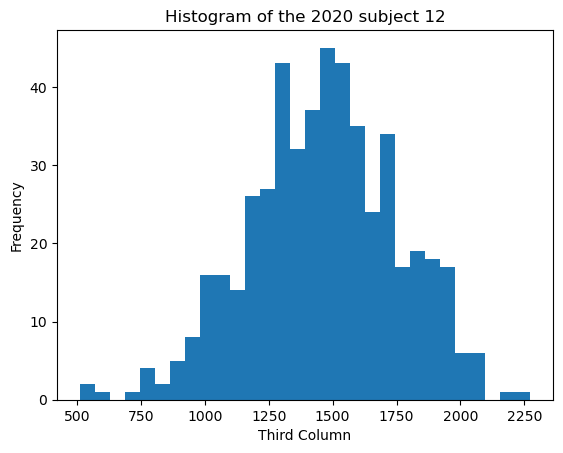

Kolmogorov-Smirnov Test Statistic: 1.0
P-value: 0.0
Average: 1466.236
Dispersion: 290.90007271226295
Confidence Interval (95%): [1440.7374843800255, 1491.7345156199747]
Kolmogorov-Smirnov Test Statistic: 1.0
P-value: 0.0


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import kstest
import numpy as np

# Load the data
df = pd.read_csv('lowest_samples2020-p12.csv')

# Extract the third column
data = df.iloc[:, 2]

# Plot histogram
plt.hist(data, bins=30)
plt.xlabel('Third Column')
plt.ylabel('Frequency')
plt.title('Histogram of the 2020 subject 12')
plt.show()

# Perform Kolmogorov-Smirnov test for normality
ks_statistic, p_value = kstest(data, 'norm')


# Calculate average and dispersion
average = np.mean(data)
dispersion = np.std(data)

# Calculate confidence intervals
confidence_interval_lower = average - 1.96 * (dispersion / np.sqrt(len(data)))
confidence_interval_upper = average + 1.96 * (dispersion / np.sqrt(len(data)))

# Print results
print(f'Kolmogorov-Smirnov Test Statistic: {ks_statistic}')
print(f'P-value: {p_value}')
print(f'Average: {average}')
print(f'Dispersion: {dispersion}')
print(f'Confidence Interval (95%): [{confidence_interval_lower}, {confidence_interval_upper}]')

# Perform Kolmogorov-Smirnov test for logistic distribution
ks_statistic, p_value = kstest(data, 'laplace')

# Print results
print(f'Kolmogorov-Smirnov Test Statistic: {ks_statistic}')
print(f'P-value: {p_value}')


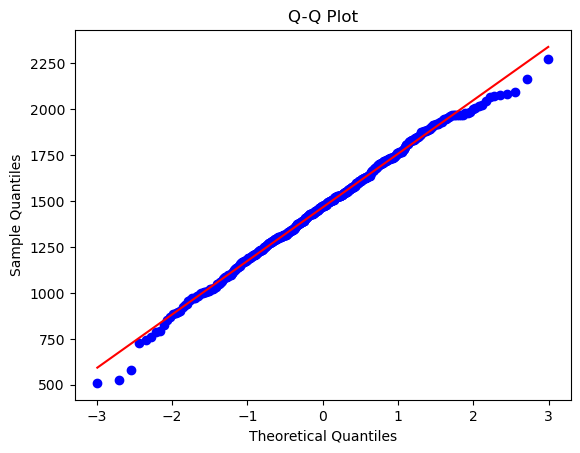

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Load the data
df = pd.read_csv('lowest_samples2020-p12.csv')

# Extract the third column
data = df.iloc[:, 2]

# Create Q-Q plot
stats.probplot(data, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()


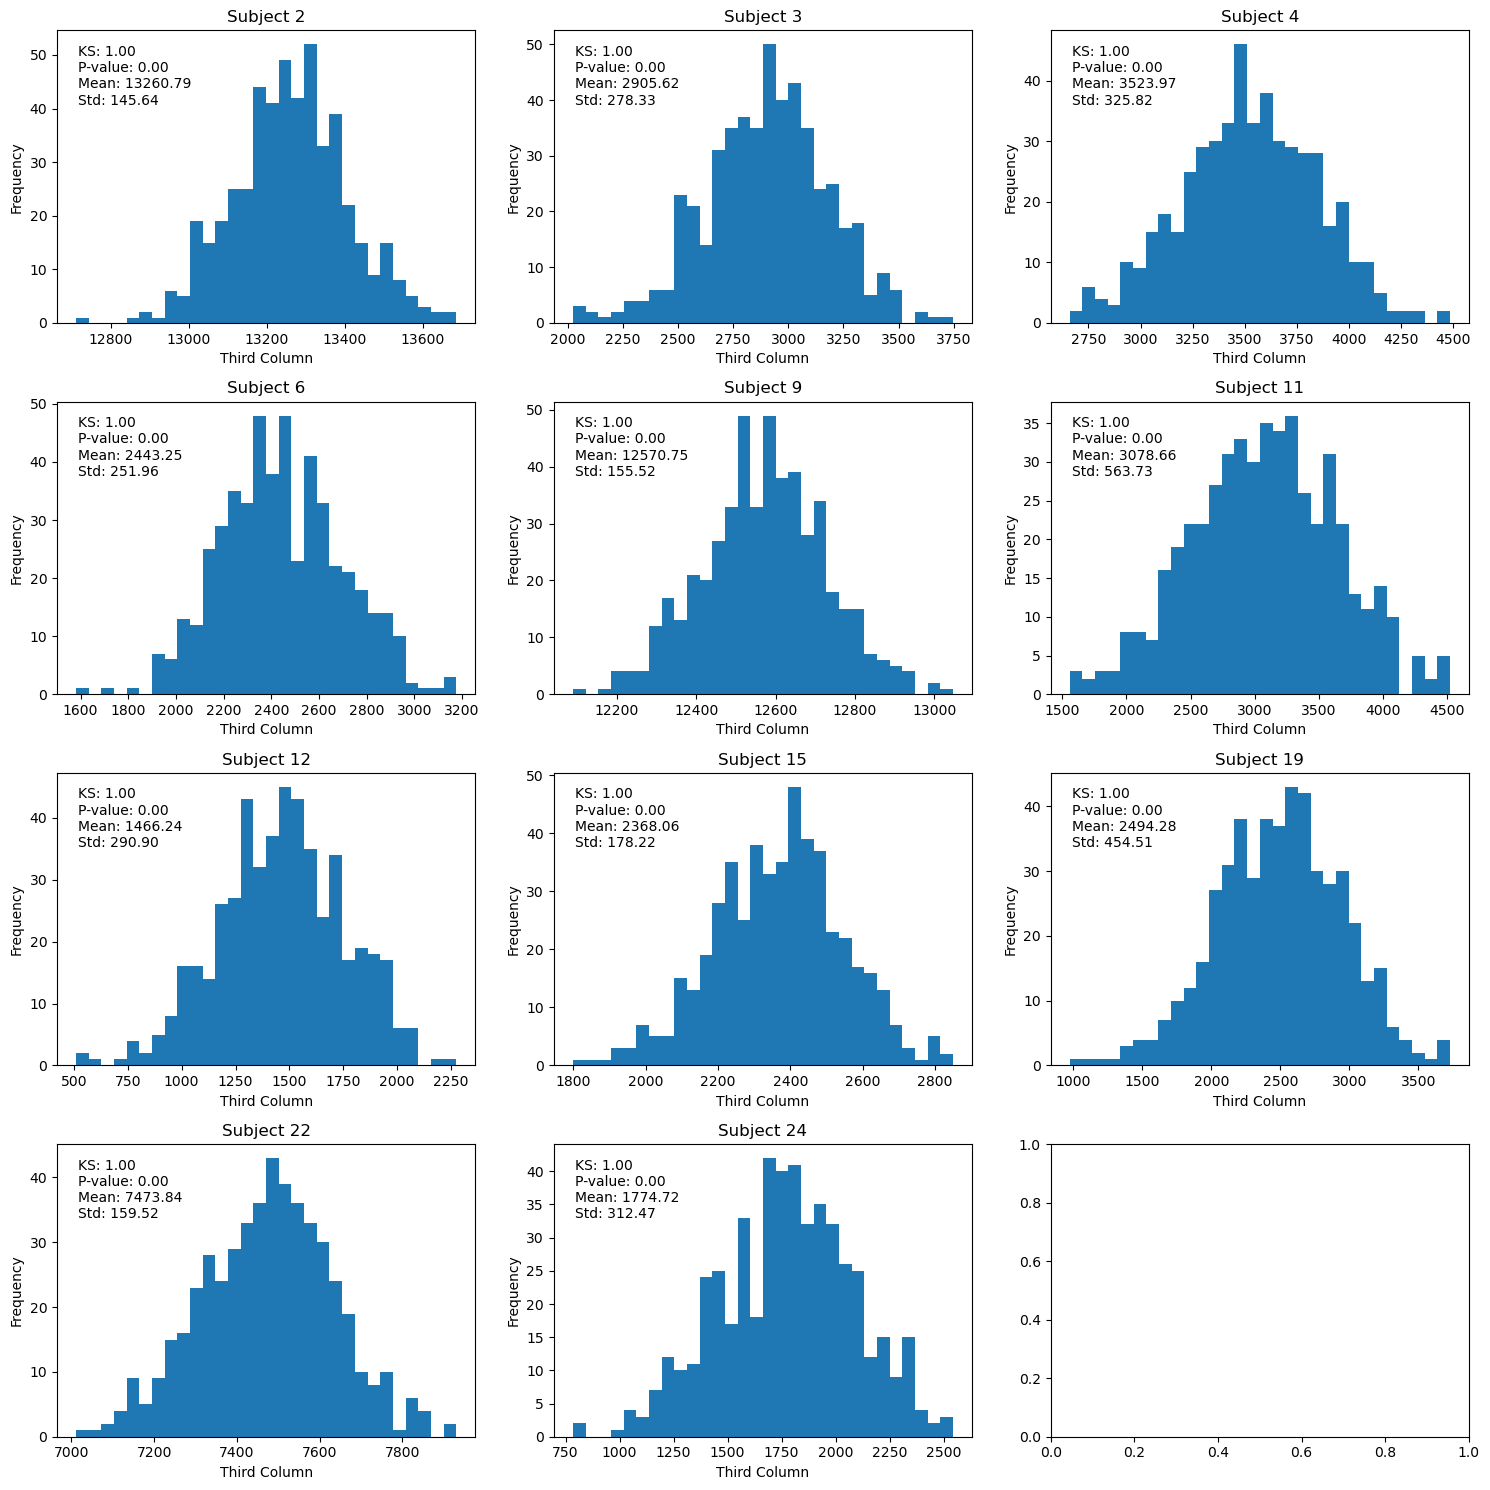

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import kstest
import numpy as np

# Create a figure and axis object for subplots
fig, axs = plt.subplots(4, 3, figsize=(15, 15))

for subject, ax in zip(set(x if x not in (1, 5, 7, 8, 10, 13, 14, 16, 17, 18, 20, 21, 23, 25) else 12 for x in range(1, 26)), axs.flatten()):
    df = pd.read_csv(f'lowest_samples2020-p{subject}.csv')

    data = df.iloc[:, 2]

    ax.hist(data, bins=30)
    ax.set_xlabel('Third Column')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Subject {subject}')

    ks_statistic, p_value = kstest(data, 'norm')

    average = np.mean(data)
    dispersion = np.std(data)

    confidence_interval_lower = average - 1.96 * (dispersion / np.sqrt(len(data)))
    confidence_interval_upper = average + 1.96 * (dispersion / np.sqrt(len(data)))

    ax.text(0.05, 0.95, f'KS: {ks_statistic:.2f}\nP-value: {p_value:.2f}\nMean: {average:.2f}\nStd: {dispersion:.2f}', transform=ax.transAxes, verticalalignment='top')

plt.tight_layout()
plt.show()
